# Primera entrega de prácticas

### Paquetes necesarios e inicializaciones

In [26]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

width = 160
heigth = 160

### Tablero de Ajedrez

Esta tarea consiste en la creación de un tablero de ajedrez, se parte de una imagen en negro y se aplica un decolorado a blanco en bloques alternantes entre filas y columnas para obtener el resultado.

Para la realización de la tarea, se ha decidido crear la imagen de fondo para crear el tablero y un tamaño de bloque igual a 20, tras esto se recorren filas y columnas en el rango del alto y ancho del tablero y se colorean los bloques pares a blanco.

(160, 160, 1)


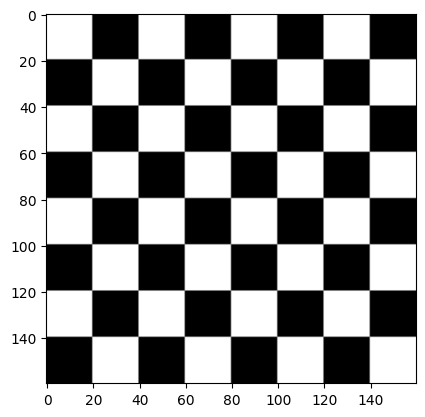

In [27]:
gray_img = np.zeros((heigth, width, 1), dtype = np.uint8)
block = 20
print(gray_img.shape)

for i in range(0, heigth, block):
    for j in range(0, width, block):
        if (i // block + j // block) % 2 == 0:
            gray_img[i:i+block, j:j+block] = 255
    
plt.imshow(gray_img, cmap='gray')
plt.show()

### Imagen de estilo Mondrian

Esta tarea consiste en la creación de una obra con el estilo artístico Mondrian.

Para realizar dicha imagen, se ha decidido recrear cuadrados de colores (dados por las coordenadas R, G, B) de manera periférica a un cuadrado grande en la esquina superior derecha de color cris claro.

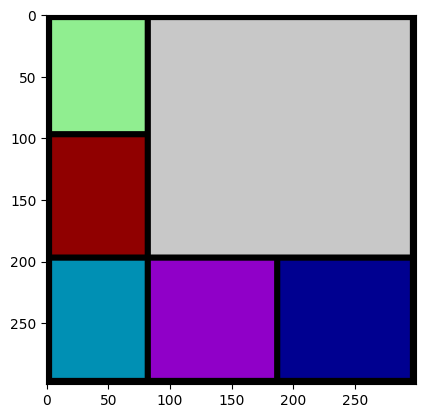

In [65]:
width = 300
heigth = 300

color_img = np.zeros((heigth, width, 3), dtype = np.uint8)

color_img[5:95, 5:80, 0] = 144
color_img[5:95, 5:80, 1] = 238
color_img[5:95, 5:80, 2] = 144

color_img[100:195, 5:80, 0] = 144

color_img[200:295, 5:80, 2] = 180
color_img[200:295, 5:80, 1] = 144

color_img[200:295, 85:185, 0] = 144
color_img[200:295, 85:185, 2] = 200

color_img[200:295, 190:295, 2] = 144

color_img [5:195, 85:295, 0] = 200
color_img [5:195, 85:295, 1] = 200
color_img [5:195, 85:295, 2] = 200

plt.imshow(color_img) 
plt.show()


### Utilización de las funciones de dibujo de OpenCV

Esta tarea consiste en utilizar las funciones dadas por el framework OpenCV, en el caso de la misma, utilizando dicho framewor, se va a realizar la creación de la bandera de Canarias.

Para la creación de la bandera de Canarias se ha hecho uso del método *cv2.rectangle* para crear las barras de color de la bandera, adicionalmente, mediante el método *cv2.putText* se asigna el texto "Canarias" en el medio en la parte central inferior.

Por último, manejando matplotlib, se manejan los ejes para quitar las barras y los números para dejar únicamente el marco negro alrededor de la imagen.

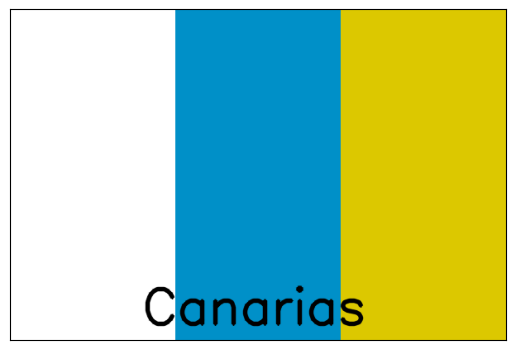

In [92]:
width = 600
heigth = 400

flag = np.zeros((heigth, width, 3), dtype=np.uint8)

stripe = width // 3

cv2.rectangle(flag, (0, 0), (stripe, heigth), (255, 255, 255), -1)
cv2.rectangle(flag, (stripe, 0), (2 * stripe, heigth), (0, 144, 200), -1)
cv2.rectangle(flag, (2 * stripe, 0), (width, heigth), (220, 200, 0), -1)

cv2.putText(flag, 'Canarias', (stripe - 40, heigth - 20), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 0), 3, cv2.LINE_AA)

plt.xticks([])
plt.yticks([])
plt.imshow(flag)
plt.show()